# Shallow Network

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
np.random.seed(1)

In [114]:
X, Y = load_planar_dataset()

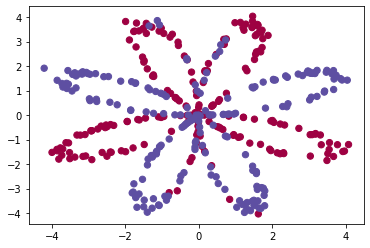

In [115]:
plt.scatter(X[0, :], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral);

In [116]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print(shape_X)
print(shape_Y)

(2, 400)
(1, 400)


## Neural network structure

In [117]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 20
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 20
The size of the output layer is: n_y = 2


### Initialize random weights and bais

In [118]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.1
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.1
    b2 = np.zeros(shape=(n_y, 1))
      
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    return {'W1':W1, 'W2':W2, 'b1':b1, 'b2':b2}

### forward propagation

In [119]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    z1 = (np.dot(W1, X)) + b1
    a1 = np.tanh(z1)
    z2 = (np.dot(W2, a1)) + b2
    a2 = sigmoid(z2)

    print(a2.shape)
    print(X.shape[1])
    assert(a2.shape == (1, X.shape[1]))

    cache = {'Z1':z1, 'A1': a1, 'Z2': z2, 'A2': a2}

    return a2, cache


### computer cost

In [120]:
def compute_cost(a2, Y, parameters):
    m = Y.shape[1]
    # logprobs = np.multiply(np.log(A2),Y)+np.multiply((1-Y),np.log(1-A2))
    # cost = -1/m * np.sum(logprobs)
    cost = (-1/m) * np.sum(Y*np.log(A2) + (1-Y) * np.log(1-A2))
    return cost

In [121]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761265


### Backward propagation

In [122]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dz2 = A2 - Y
    dW2 = 1/m * np.dot(dz2, A1.T)
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(W2.T, dz2), (1- np.power(A1, 2)))
    dW1 = 1/m * np.dot(dz1, X.T)
    db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)

    grads = {'dW1': dW1,
             'dW2': dW2,
             'db1': db1,
             'db2': db2}  

    return grads

### Update parameter ( Gradient decents)

In [123]:
def update_parameters(parameters, grads, learning_rate=0.001):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    dw1 = grads['dW1']
    dw2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dw1
    W2 = W2 - learning_rate * dw2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Integrating all parts

In [124]:
def nn_model(X, Y, n_h, num_iteration=10000, print_cost=False):
    np.random.seed(0)
    n_x, _ , n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iteration):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters=parameters, grads=grads)
        if i % 1000 == 0:
            print(f'Cost after iteration {i, cost}')
    
    return parameters

In [125]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    prediction = 1 if A2 >= 0.5 else 0
    return prediction

In [126]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

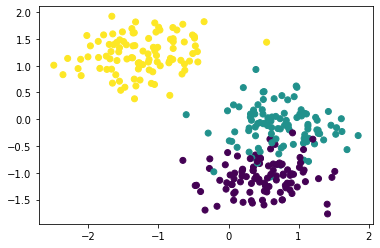

In [127]:
data = make_blobs(n_samples=300, n_features=2)
data_x = StandardScaler().fit_transform(data[0])
import matplotlib.pyplot as plt

plt.scatter(data_x[:, 0], data_x[:, 1], c=data[1])

In [105]:
from shallow_network import layer_sizes, nn_model, forward_propagation

In [128]:
import numpy as np
x = np.array([[0.12, 0.42, 0.123], [0.21, 0.53, 0.939]])
y = np.array([[1], [0]])

In [129]:
data_x = data_x.T
data_y = data[1].reshape(1, -1)

In [130]:
print(data_x.shape)
print(data_y.shape)

(2, 300)
(1, 300)
